In [2]:
#Imports
import pandas as pd
import numpy as np
import pylab as plt
import seaborn as sns
%matplotlib inline

#Format
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))


### Idea:
- Where is the capital going? Who benefits from tax avoidance? Is it true that lower taxation bring jobs?
- Let's do: % wages and fixed capital vs tax rate

In [20]:
#load results
tax_data = pd.read_csv("./data/tax_2018_formatted.tsv",sep="\t",index_col=0,na_values=["\\N"])
tax_data = tax_data.loc[tax_data["consolidationCode"].str[0]=="C"]

In [28]:
tax_data["tax_rate"] = tax_data["incomeTaxPayable"]/tax_data["PLbeforeTax"]

In [27]:
import statsmodels.formula.api as smf

In [ ]:
smf.ols("costEmployees ~ tax_rate",data=tax_data).fit().summary()

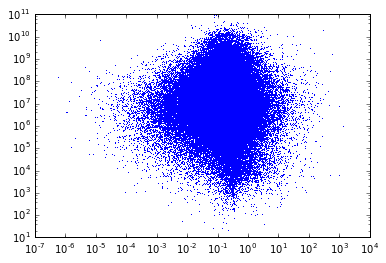

In [26]:
plt.plot(tax_data["incomeTaxPayable"]/tax_data["PLbeforeTax"],tax_data["costEmployees"],",")
plt.xscale("log")
plt.yscale("log")

In [21]:
tax_data.head()

,BvD,consolidationCode,year,operatingRevenue,PLbeforeTax,Taxation,PLafterTax,deferredTaxes,coreNACE,entityType,...,costEmployees,depreciation_amortization,interestPaid,RDexpenses,deferredTaxes_new,group_size_rev,group_size_ass,group_size_rev_u,group_size_ass_u,letterNACE
0,ADFEB18424,C1,2013,268388023.0,98338102.0,9965376,88372726.0,NaN,6619.0,B,...,NaN,NaN,NaN,NaN,NaN,9.0,9.0,-9.0,-9.0,K
1,ADFEB18424,C1,2014,267416584.0,86691639.0,8662608,78029031.0,NaN,6619.0,B,...,NaN,NaN,NaN,NaN,NaN,9.0,9.0,-9.0,-9.0,K
2,ADFEB18424,C1,2015,271222372.0,61703158.0,2861103,58842054.0,NaN,6619.0,B,...,NaN,NaN,NaN,NaN,NaN,9.0,9.0,-9.0,-9.0,K
3,ADFEB18424,C1,2016,270773001.0,56229912.0,6668237,49561676.0,NaN,6619.0,B,...,NaN,NaN,NaN,NaN,NaN,9.0,9.0,-9.0,-9.0,K
4,ADFEB32643,C1,2013,161864963.0,63955761.0,5519158,58436603.0,NaN,6419.0,B,...,NaN,NaN,NaN,NaN,NaN,9.0,9.0,-9.0,-9.0,K


In [3]:
#Read data
all_data = pd.read_csv("data/all_data.tsv",index_col=None,sep="\t")
all_data.head()

,iso2,year,tax_rate_mean,tax_rate2_mean,tfa_wages_mean,ifa_wages_mean,cash_wages_mean,loans_wages_mean,capital_wages_mean,interestPaid_wages_mean,...,cash_wages_wcount,loans_wages_wcount,capital_wages_wcount,interestPaid_wages_wcount,RDexpenses_wages_wcount,profit_rate_rev_wcount,profit_rate_emp_wcount,zero_profits,mult,cons
0,AD,2013,0.093817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0,1
1,AD,2014,0.088203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0,1
2,AD,2015,0.057307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0,1
3,AD,2016,0.098012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0,1
4,AE,1998,0.023718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1


(-10, 1000)

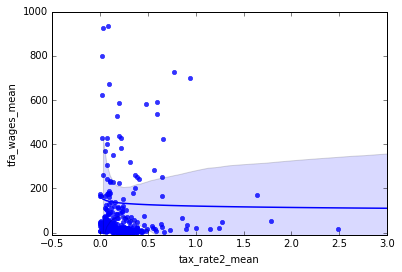

In [19]:
sns.regplot("tax_rate2_mean","tfa_wages_mean",data=all_data.loc[all_data["tfa_wages_count"]>1000],logx=True)
plt.ylim(-10,1000)